In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Load the dataset
#file_path = r"C:\Users\ganna\PycharmProjects\DS-Project\loan_approval_dataset.csv"
file_path = r"C:\Users\fosam\OneDrive\Desktop\Uni\Semester 4\Data Science\Project\loan_approval_dataset.csv"
#file_path = r"C:\Users\elena\Desktop\uni\data science\project\archive\loan_approval_dataset.csv"
data = pd.read_csv(file_path)

In [2]:

#1-a Display the first and last 12 rows of the dataset
first_12_rows = data.head(12)
print(first_12_rows)
#last 12
last_12_rows = data.tail(12)
print(last_12_rows)

    Applicant_ID  Age  Income  Credit_Score  Loan_Amount  Loan_Term  \
0              1   56   21920           639       452748         72   
1              2   69  126121           655       257134         60   
2              3   46   96872           467       226437         72   
3              4   32  101132           751       310480         12   
4              5   60   22093           404        13070         12   
5              6   25   32905           449         6320         24   
6              7   38  141759           445       356187         72   
7              8   56  175423           598       306065         24   
8              9   36   50981           466        11589         24   
9             10   40   93903           347       462625         48   
10            11   28   90821           538       360139         60   
11            12   28  129200           306        20589         36   

    Interest_Rate Employment_Status  Debt_to_Income_Ratio Marital_Status  \


In [3]:

# 1-b  Identify and print the total number of rows and columns present
rows, columns = data.shape
print(f"Total number of rows: {rows}")
print(f"Total number of columns: {columns}")

Total number of rows: 5000
Total number of columns: 14


In [4]:

# 1-c Display column names and inferred data types
print("Column Names and Data Types:")
print(data.dtypes)

Column Names and Data Types:
Applicant_ID              int64
Age                       int64
Income                    int64
Credit_Score              int64
Loan_Amount               int64
Loan_Term                 int64
Interest_Rate           float64
Employment_Status        object
Debt_to_Income_Ratio    float64
Marital_Status           object
Number_of_Dependents      int64
Property_Ownership       object
Loan_Purpose             object
Previous_Defaults         int64
dtype: object


In [5]:

#1-d Print the name of the first column
first_column_name=data.columns[0]
print("name of the first column:", first_column_name)

name of the first column: Applicant_ID


In [ ]:
# 1-e Generate a summary of the dataset
print("Dataset summary:")
print(data.info())

Dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Applicant_ID          5000 non-null   int64  
 1   Age                   5000 non-null   int64  
 2   Income                5000 non-null   int64  
 3   Credit_Score          5000 non-null   int64  
 4   Loan_Amount           5000 non-null   int64  
 5   Loan_Term             5000 non-null   int64  
 6   Interest_Rate         5000 non-null   float64
 7   Employment_Status     5000 non-null   object 
 8   Debt_to_Income_Ratio  5000 non-null   float64
 9   Marital_Status        5000 non-null   object 
 10  Number_of_Dependents  5000 non-null   int64  
 11  Property_Ownership    5000 non-null   object 
 12  Loan_Purpose          5000 non-null   object 
 13  Previous_Defaults     5000 non-null   int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 547.0+

In [7]:

# 1-f Choose a categorical column
categorical_column = 'Employment_Status'

# Display distinct values from the chosen column
distinct_values = data[categorical_column].unique()

print(f"Distinct values in '{categorical_column}':")
print(distinct_values)

Distinct values in 'Employment_Status':
['Unemployed' 'Self-Employed' 'Employed']


In [8]:

#1-g Identify the most frequently occurring value in the chosen categorical attribute
categorical_column = 'Employment_Status'
most_frequent_value = data [categorical_column].mode()[0]
print(f"The most frequently occurring value in '{categorical_column}' is: {most_frequent_value}")


The most frequently occurring value in 'Employment_Status' is: Self-Employed


In [ ]:
#1-h
def calculate_and_print_stats(data, numerical_column):
    # Calculate the statistics
    mean_value = data[numerical_column].mean()
    median_value = data[numerical_column].median()
    std_deviation = data[numerical_column].std()

    # Calculate percentiles (20th, 50th, 75th)
    percentile_25 = data[numerical_column].quantile(0.2)
    percentile_50 = data[numerical_column].quantile(0.5)  # Same as the median
    percentile_75 = data[numerical_column].quantile(0.75)

    # Present the results
    print(f"Statistics for '{numerical_column}':")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Standard Deviation: {std_deviation}")
    print(f"25th Percentile: {percentile_25}")
    print(f"50th Percentile (Median): {percentile_50}")
    print(f"75th Percentile: {percentile_75}")
    print()  # Add empty line for separation

# List of columns to analyze
numerical_columns = [
    'Age', 
    'Income', 
    'Credit_Score', 
    'Loan_Amount', 
    'Loan_Term', 
    'Interest_Rate', 
    'Debt_to_Income_Ratio', 
    'Number_of_Dependents'
]

# Calculate and print stats for each column
for column in numerical_columns:
    calculate_and_print_stats(data, column)

Statistics for 'Age':
Mean: -1.2079226507921704e-16
Median: -0.03918860475406916
Standard Deviation: 1.0001000150025003
25th Percentile: -1.0447121615639146
50th Percentile (Median): -0.03918860475406916
75th Percentile: 0.8322651444811302

Statistics for 'Income':
Mean: -5.2580162446247416e-17
Median: -0.0007633352310717679
Standard Deviation: 1.0001000150025003
25th Percentile: -1.0439689461776127
50th Percentile (Median): -0.0007633352310717679
75th Percentile: 0.8743873422669661

Statistics for 'Credit_Score':
Mean: -3.439026841078885e-16
Median: -0.007375562133612596
Standard Deviation: 1.0001000150025003
25th Percentile: -1.0546156216728766
50th Percentile (Median): -0.007375562133612596
75th Percentile: 0.8777916310483844

Statistics for 'Loan_Amount':
Mean: 5.488942633746774e-17
Median: -0.008922052017517147
Standard Deviation: 1.0001000150025006
25th Percentile: -1.0365735342960833
50th Percentile (Median): -0.008922052017517147
75th Percentile: 0.8831242756661588

Statistics 

In [10]:

#2-a Apply a filter to select rows based on a specific condition of your choice income > 100000
filtered_income = data[data["Income"] > 100000]
print(filtered_income)

      Applicant_ID  Age  Income  Credit_Score  Loan_Amount  Loan_Term  \
1                2   69  126121           655       257134         60   
3                4   32  101132           751       310480         12   
6                7   38  141759           445       356187         72   
7                8   56  175423           598       306065         24   
11              12   28  129200           306        20589         36   
...            ...  ...     ...           ...          ...        ...   
4993          4994   62  176390           594       182452         12   
4995          4996   24  169594           755       299944         48   
4996          4997   66  162728           829        15886         24   
4997          4998   26  166965           468       477830         48   
4999          5000   36  154704           336       183308         36   

      Interest_Rate Employment_Status  Debt_to_Income_Ratio Marital_Status  \
1              5.38        Unemployed        

In [11]:

#2-b Identify records with attribute that starts with a specific letter
# Choose an attribute (replace 'Name' with the actual column name)
column_name = 'Loan_Purpose'  # Example categorical column

# Filter rows where the chosen attribute starts with a specific letter (e.g., 'A')
filtered_records = data[data[column_name].str.startswith('C', na=False)]

# Count the number of matching records
matching_count = filtered_records.shape[0]

print(f"Number of records where '{column_name}' starts with 'C': {matching_count}")


Number of records where 'Loan_Purpose' starts with 'C': 1015


In [12]:

# 2-c Check for duplicate rows
duplicate_rows = data.duplicated()

# Count the total number of duplicate rows
total_duplicates = duplicate_rows.sum()
print(f"Total number of duplicate rows: {total_duplicates}")

# Remove duplicate rows if any are found
if total_duplicates > 0:
    data = data.drop_duplicates()
    print(f"Duplicates have been removed. Updated dataset now has {len(data)} rows.")
else:
    print("No duplicate rows found in the dataset.")


Total number of duplicate rows: 0
No duplicate rows found in the dataset.


In [13]:

#2-d Convert the data type of a numerical column from integer to string
numerical_column_name = 'Age'
data[numerical_column_name]=data[numerical_column_name].astype(str)
print(data[numerical_column_name].dtype)

#converting d back to an int
data[numerical_column_name] = data[numerical_column_name].astype(int)
print(data[numerical_column_name].dtype)

object
int64


In [14]:
#2-e Grouping Dataset
grouped_data = data.groupby(['Income', 'Age'])  # Example categorical columns

# Perform analysis (e.g., count the number of records in each group)
grouped_counts = grouped_data.size().reset_index(name='Counts')

print("Grouped data analysis:")
print(grouped_counts)

Grouped data analysis:
      Income  Age  Counts
0      20028   54       1
1      20055   47       1
2      20060   41       1
3      20066   55       1
4      20074   62       1
...      ...  ...     ...
4995  199921   32       1
4996  199949   36       1
4997  199965   24       1
4998  199971   38       1
4999  199992   48       1

[5000 rows x 3 columns]


In [15]:
# 2-f Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display columns with missing values and their counts
print("Missing values per column:")
print(missing_values)

# Check if there are any missing values at all
total_missing = missing_values.sum()
if total_missing > 0:
    print(f"\nTotal missing values in the dataset: {total_missing}")
else:
    print("\nThere are no missing values in the dataset.")

Missing values per column:
Applicant_ID            0
Age                     0
Income                  0
Credit_Score            0
Loan_Amount             0
Loan_Term               0
Interest_Rate           0
Employment_Status       0
Debt_to_Income_Ratio    0
Marital_Status          0
Number_of_Dependents    0
Property_Ownership      0
Loan_Purpose            0
Previous_Defaults       0
dtype: int64

There are no missing values in the dataset.


In [16]:
#2-g If any missing values are found, replace them with the median or mode as appropriate
numerical_columns = ['Age', 'Income', 'Credit_Score', 'Loan_Amount', 'Loan_Term', 'Interest_Rate', 'Debt_to_Income_Ratio', 'Number_of_Dependents', 'Previous_Defaults' ]
for column in numerical_columns:
  median_value = data[column].median()
  data[column] = data[column].fillna(median_value)
categorical_columns = ['Employment_Status', 'Marital_Status', 'Property_Ownership', 'Loan_Purpose']
for column in categorical_columns:
  mode_value = data[column].mode()[0]
  data[column] = data[column].fillna(mode_value)

#print(data.isnull().sum())


In [17]:
# 2-h Divide and count
# Choose a numerical column (replace 'Income' with the actual column name)
numerical_column = 'Income'

# Divide the column into 5 equal-width bins
data['Income_Bins'] = pd.cut(data[numerical_column], bins=5)

# Count the number of records in each bin
bin_counts = data['Income_Bins'].value_counts()

print("Number of records in each bin:")
print(bin_counts)

Number of records in each bin:
Income_Bins
(92013.6, 128006.4]     1029
(163999.2, 199992.0]    1019
(19848.036, 56020.8]    1008
(128006.4, 163999.2]     982
(56020.8, 92013.6]       962
Name: count, dtype: int64


In [ ]:
# 2-i Select the numerical feature you want to analyze
selected_feature = 'Income' 

# Find the index of the row with the maximum value in the selected feature
max_index = data[selected_feature].idxmax()

# Retrieve and print the corresponding row
max_row = data.loc[max_index]
print("Row corresponding to the maximum value of", selected_feature, ":")
print(max_row)

Row corresponding to the maximum value of Income :
Applicant_ID                             708
Age                                       48
Income                                199992
Credit_Score                             469
Loan_Amount                           352364
Loan_Term                                 12
Interest_Rate                           12.7
Employment_Status              Self-Employed
Debt_to_Income_Ratio                   33.71
Marital_Status                        Single
Number_of_Dependents                       1
Property_Ownership                       Own
Loan_Purpose                             Car
Previous_Defaults                          0
Income_Bins             (163999.2, 199992.0]
Name: 707, dtype: object


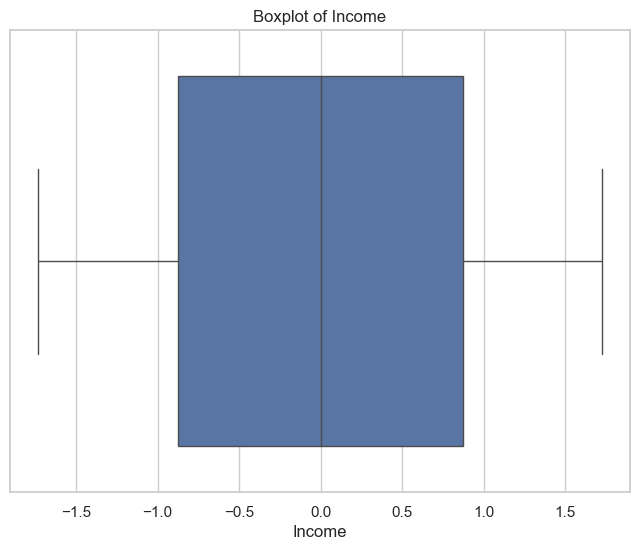

- Income is a critical factor in determining a borrower's ability to repay a loan.


In [ ]:
#2-j Construct a boxplot for an attribute you consider significant and justify the selection.
# Set the style for the plot
#sns.set(style="whitegrid")

# Create a boxplot for the 'Income' column
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=data['Income'])

# Add title and labels
plt.title('Boxplot of Income')
plt.xlabel('Income')

# Show the plot
plt.show(block=True)

print("- Income is a critical factor in determining a borrower's ability to repay a loan.")

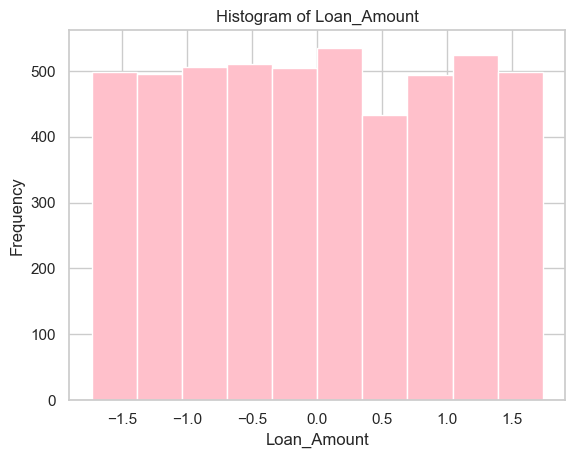

In [33]:
#2-k Histogram
numerical_column = 'Loan_Amount'
# Generate a histogram
plt.hist(data[numerical_column], bins=10, color='pink', edgecolor='white')
plt.title(f"Histogram of {numerical_column}")
plt.xlabel(numerical_column)
plt.ylabel("Frequency")
plt.show(block=True)

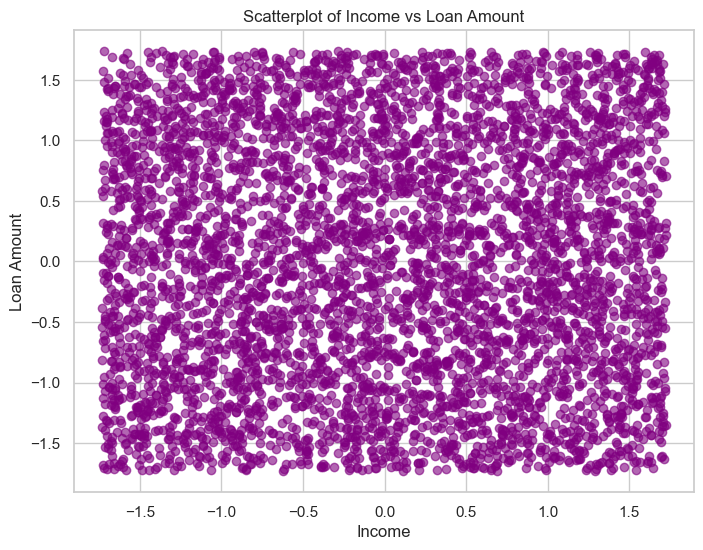

In [35]:
# 2-l Scatter plot using two attributes
x = data['Income']  # Attribute 1 (e.g., Income)
y = data['Loan_Amount']  # Attribute 2 (e.g., Loan Amount)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='purple', alpha=0.6)
plt.title('Scatterplot of Income vs Loan Amount')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.grid(True)

# Show the scatterplot
plt.show()

In [22]:
#2-m Normalize the numerical attributes using StandardScaler to achieve standardized data.
numerical_columns = ['Age', 'Income', 'Credit_Score', 'Loan_Amount', 'Loan_Term', 'Interest_Rate', 'Debt_to_Income_Ratio', 'Number_of_Dependents', 'Previous_Defaults' ]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the first few rows to verify
print(data.head())

   Applicant_ID       Age    Income  Credit_Score  Loan_Amount  Loan_Term  \
0             1  0.832265 -1.695793      0.404040     1.407277   1.467723   
1             2  1.703719  0.305372      0.503777     0.035180   0.885108   
2             3  0.161916 -0.256351     -0.668134    -0.180138   1.467723   
3             4 -0.776573 -0.174538      1.102200     0.409366  -1.445350   
4             5  1.100405 -1.692471     -1.060849    -1.676760  -1.445350   

   Interest_Rate Employment_Status  Debt_to_Income_Ratio Marital_Status  \
0      -1.198974        Unemployed              1.254939        Married   
1      -0.964315        Unemployed             -1.300293       Divorced   
2      -1.494368     Self-Employed              1.413235       Divorced   
3       1.415402        Unemployed             -1.443069         Single   
4       0.070945     Self-Employed             -0.502607       Divorced   

   Number_of_Dependents Property_Ownership Loan_Purpose  Previous_Defaults  \
0       

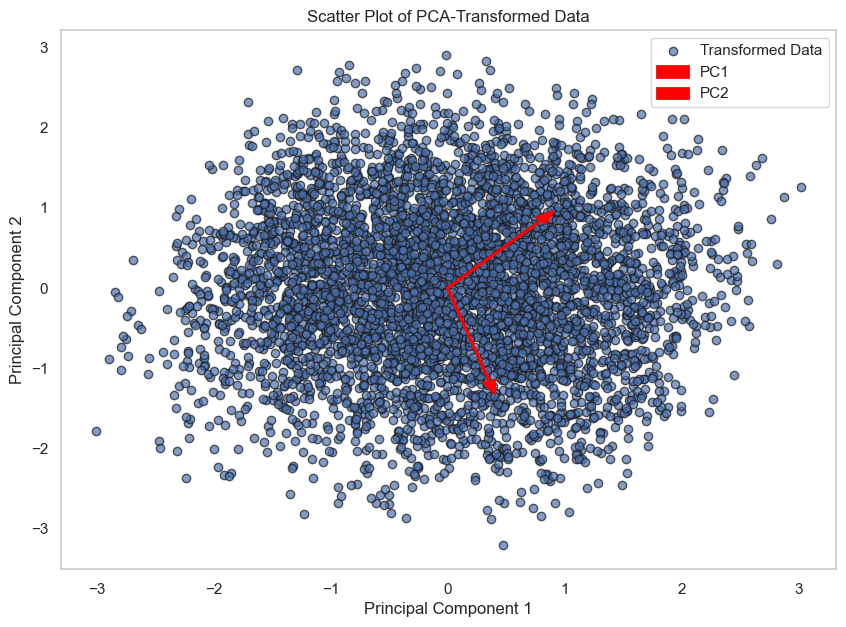

In [23]:
#2-n PCA
# Select numerical columns (replace with relevant column names)
features = ['Age', 'Income', 'Credit_Score', 'Loan_Amount', 'Loan_Term', 'Interest_Rate', 'Debt_to_Income_Ratio']

# Standardize the feature columns (Zero mean, Unit variance)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Step 2: Apply PCA
pca = PCA(n_components=2)  # Reduce feature space to 2 components
principal_components = pca.fit_transform(scaled_data)

# Extract the eigenvectors and eigenvalues
eigenvectors = pca.components_  # Principal axes (directions of variance)
eigenvalues = pca.explained_variance_  # Variance values for each principal component

# Step 3: Visualize the Transformed Data (Scatter Plot)
plt.figure(figsize=(10, 7))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.7, edgecolor="k", label='Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of PCA-Transformed Data')

# Step 4: Plot Unit Vector Arrows Representing Eigenvectors
# Scale eigenvectors for visibility in the scatter plot
arrow_scale = 2
for i, vector in enumerate(eigenvectors):
    plt.arrow(0, 0, arrow_scale * vector[0], arrow_scale * vector[1],
              color='red', head_width=0.1, head_length=0.15, linewidth=2, label=f"PC{i + 1}")

# Add grid and legend
plt.grid()
plt.legend()
plt.show()


# numerical_columns = ['Loan_Amount', 'Income', 'Age']
#
# # Normalize the data
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data[numerical_columns])
#
# # Apply PCA to reduce dimensionality to 2 components
# pca = PCA(n_components=2)
# pca_data = pca.fit_transform(scaled_data)
#
# # Visualize the dataset after PCA
# plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.7, c='blue', edgecolor='black')
# plt.title("Dataset after PCA (2 Components)")
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.show(block=True)


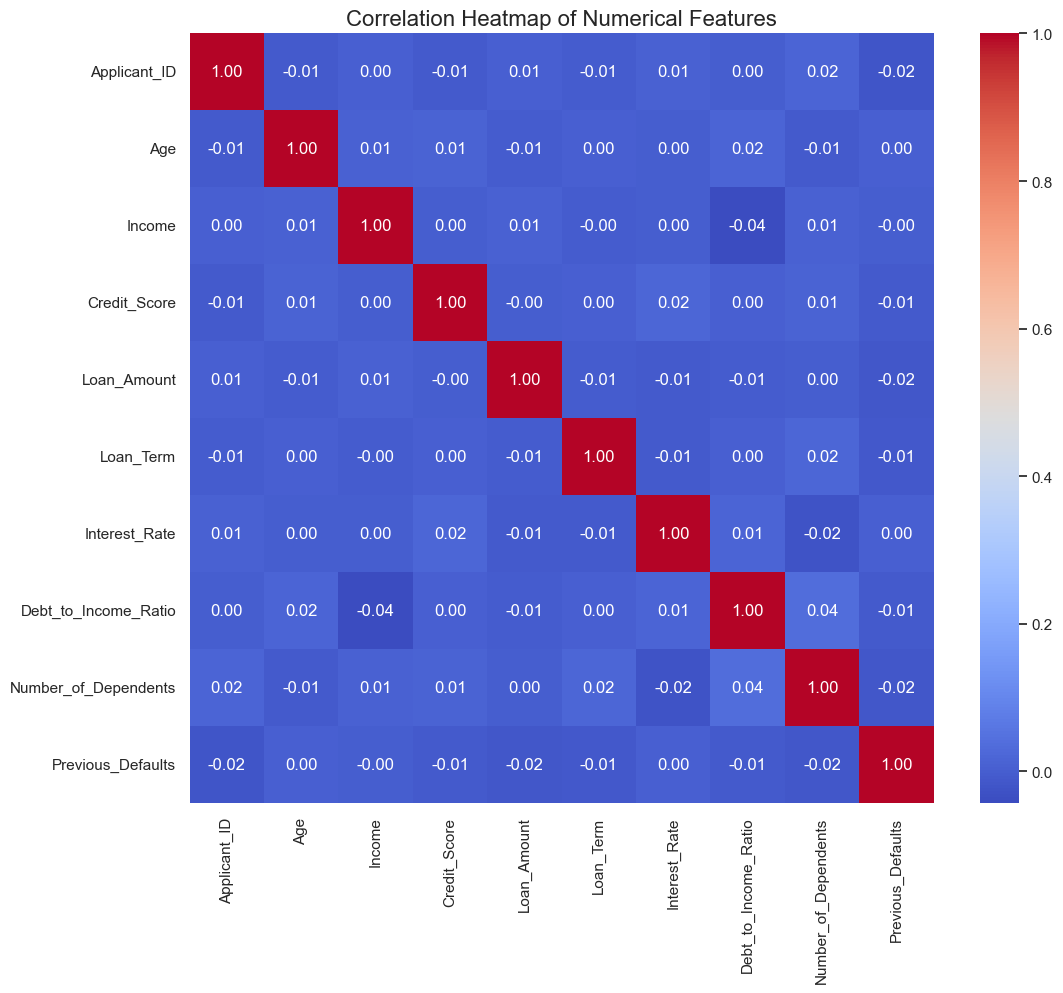

In [24]:
# 2-o Calculate the correlation matrix for numerical features
# Select only numerical features for the correlation analysis
numerical_features = data.select_dtypes(include=['float64', 'int64'])

# Drop rows with missing values in numerical columns to avoid errors
numerical_features = numerical_features.dropna()

# Compute the correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add the title and labels
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

Correlation Matrix:
                      Applicant_ID       Age    Income  Credit_Score  \
Applicant_ID              1.000000 -0.010360  0.001925     -0.008249   
Age                      -0.010360  1.000000  0.009228      0.010137   
Income                    0.001925  0.009228  1.000000      0.000600   
Credit_Score             -0.008249  0.010137  0.000600      1.000000   
Loan_Amount               0.005366 -0.005220  0.007326     -0.001115   
Loan_Term                -0.006222  0.002661 -0.003589      0.004614   
Interest_Rate             0.006618  0.001338  0.000425      0.018881   
Debt_to_Income_Ratio      0.000160  0.016105 -0.043472      0.001723   
Number_of_Dependents      0.017009 -0.010104  0.005889      0.012144   
Previous_Defaults        -0.022782  0.002799 -0.000607     -0.008667   

                      Loan_Amount  Loan_Term  Interest_Rate  \
Applicant_ID             0.005366  -0.006222       0.006618   
Age                     -0.005220   0.002661       0.001338  

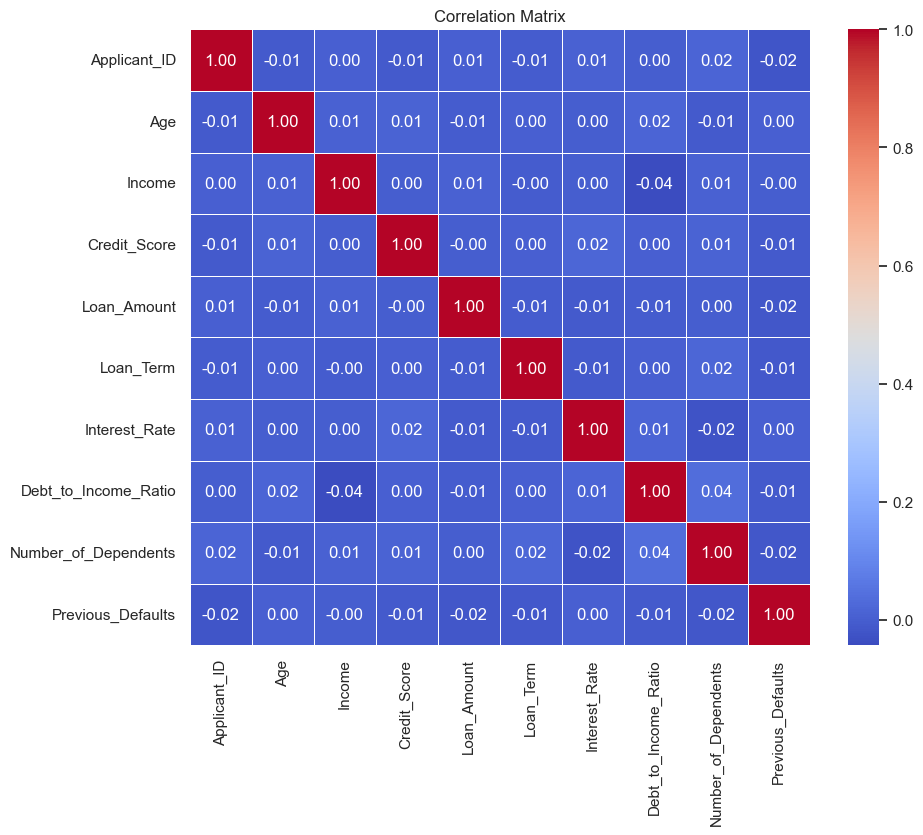


Correlation with Target Variable (Previous_Defaults):
Previous_Defaults       1.000000
Interest_Rate           0.003515
Age                     0.002799
Income                 -0.000607
Credit_Score           -0.008667
Debt_to_Income_Ratio   -0.008920
Loan_Term              -0.013225
Loan_Amount            -0.016602
Number_of_Dependents   -0.017721
Applicant_ID           -0.022782
Name: Previous_Defaults, dtype: float64


In [25]:
#3-a  Use Python to calculate and display the correlation matrix, and identify potential features relevant for classification# Import required libraries

# Select only numerical columns
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show(block=True)

# Identify potential features relevant for classification
# (Assuming 'Previous_Defaults' is the target variable)
target_correlation = correlation_matrix['Previous_Defaults'].sort_values(ascending=False)
print("\nCorrelation with Target Variable (Previous_Defaults):")
print(target_correlation)


In [26]:
#3-b
# Choose a categorical feature (replace 'Loan_Status' with the desired column name)
categorical_feature = 'Employment_Status'

# Find the class distribution
class_distribution = data[categorical_feature].value_counts()

# Display the class distribution
print(f"Class distribution for '{categorical_feature}':")
print(class_distribution)

# Optional: Calculate the percentage distribution
percentage_distribution = data[categorical_feature].value_counts(normalize=True) * 100
print("\nPercentage distribution:")
print(percentage_distribution)

Class distribution for 'Employment_Status':
Employment_Status
Self-Employed    1723
Employed         1666
Unemployed       1611
Name: count, dtype: int64

Percentage distribution:
Employment_Status
Self-Employed    34.46
Employed         33.32
Unemployed       32.22
Name: proportion, dtype: float64


In [27]:
# 3-c
# 1. Loan-to-Income Ratio
data['Loan_to_Income_Ratio'] = data['Loan_Amount'] / data['Income']
# Significance: Helps measure the size of the loan relative to the applicant’s income,
# a standard indicator of ability to repay.

# 2. Debt Burden (assuming a column 'Monthly_Loan_Repayment' exists)
if 'Monthly_Loan_Repayment' in data.columns:
    data['Debt_Burden'] = (data['Monthly_Loan_Repayment'] / data['Income']) * 100
    # Significance: Indicates affordability and how much of their income the applicant commits to debt.

# 3. Binary Feature for Employment Status ('Employment_Status' column exists)
data['Is_Self_Employed'] = data['Employment_Status'].apply(lambda x: 1 if x == 'Self-Employed' else 0)
# Significance: Often employed in models to distinguish high-risk applicants based on employment type.

# 4. Log transformation of Income and Loan Amount to reduce skewness
data['Log_Income'] = np.log1p(data['Income'])  # Log1p is used to avoid log(0)
data['Log_Loan_Amount'] = np.log1p(data['Loan_Amount'])
# Significance: Log transformation helps deal with skewed distributions, making them more suitable for predictive models.

# Display the first few rows after feature engineering
print("Dataset after feature engineering:")
print(data.head())


Dataset after feature engineering:
   Applicant_ID       Age    Income  Credit_Score  Loan_Amount  Loan_Term  \
0             1  0.832265 -1.695793      0.404040     1.407277   1.467723   
1             2  1.703719  0.305372      0.503777     0.035180   0.885108   
2             3  0.161916 -0.256351     -0.668134    -0.180138   1.467723   
3             4 -0.776573 -0.174538      1.102200     0.409366  -1.445350   
4             5  1.100405 -1.692471     -1.060849    -1.676760  -1.445350   

   Interest_Rate Employment_Status  Debt_to_Income_Ratio Marital_Status  \
0      -1.198974        Unemployed              1.254939        Married   
1      -0.964315        Unemployed             -1.300293       Divorced   
2      -1.494368     Self-Employed              1.413235       Divorced   
3       1.415402        Unemployed             -1.443069         Single   
4       0.070945     Self-Employed             -0.502607       Divorced   

   Number_of_Dependents Property_Ownership Loan_Pur

c:\Users\fosam\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\fosam\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
